In [82]:
%load_ext autoreload
%autoreload 2
from mlp2 import *
import numpy as np
from os import listdir
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
datasets = {}
path = 'project-1-part-1-data'
for file in listdir(path):
    datasets[file[:-4]] = np.loadtxt(path+'/'+file, delimiter=',', skiprows=1)

In [73]:
datasets.keys()

dict_keys(['data.three_gauss.train.10000', 'data.simple.train.10000', 'data.simple.test.10000', 'data.three_gauss.test.10000'])

In [74]:
X_train = datasets['data.simple.train.10000'][:,:-1]
T_tr = datasets['data.simple.train.10000'][:,-1].astype(int)
X_test = datasets['data.simple.test.10000'][:,:-1]
T_tst = datasets['data.simple.test.10000'][:,-1].astype(int)

In [75]:
T_train = np.zeros((T_tr.size, T_tr.max()))
T_train[np.arange(T_tr.size),T_tr-1] = 1

In [76]:
T_test = np.zeros((T_tst.size, T_tst.max()))
T_test[np.arange(T_tst.size),T_tst-1] = 1

In [77]:
X_train.shape[1]

2

In [78]:
T_test.shape[1]

2

In [79]:
np.seterr(all='raise', under='warn', over='warn')
rng = np.random.RandomState(1234)
net = MLP(rng=rng,
          n_inputs= X_train.shape[1],
          layers=None, 
          layers_default=[5, 50, 2, SigmaLayer], 
          bias=True, 
          batch_size=10, 
          n_epochs=100, 
          eta=0.5, 
          momentum=0.5, 
          classification=True)

In [80]:
output =  net.train(X_train, 
          T_train, 
          X_test=X_test, 
          T_test=T_test, 
          verbose=False)

/home/marek/Dokumenty/DS_mgr/SEM02/DL/mlp2.py:183: RuntimeWarning: underflow encountered in true_divide
  X2 = 1 / ( 1 + np.exp(-X) )
/home/marek/Dokumenty/DS_mgr/SEM02/DL/mlp2.py:84: RuntimeWarning: underflow encountered in true_divide
  dW = X.T.dot(delta_next)/X.shape[0]
/home/marek/Dokumenty/DS_mgr/SEM02/DL/mlp2.py:515: RuntimeWarning: underflow encountered in multiply
  dtheta = [-self.eta * g for g in gs]


In [81]:
output.keys()

dict_keys(['loss_train', 'acc_train', 'loss_test', 'acc_test', 'Linear_1', 'Linear_2', 'Linear_3', 'Linear_4', 'Linear_5', 'Linear_6'])

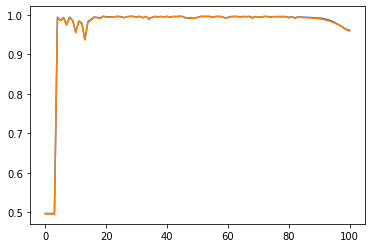

In [85]:
plt.plot(output['acc_train'])
plt.plot(output['acc_test'])

In [88]:
output['loss_test'][0].shape

(10000, 1)